# Assignment 2 - Social Network Dataset

(20 points)

### Add your name(s) and EIDs below
- Student Name: Yuxuan Geng
- Student UT EID: yg7663
- Partner Name: Mingda Li
- Partner UT EID: ml49835

### Grading clarifications
1. **Please do not change the variable names** we give you for your answer to each question. You can use other variables if you wish, but the final answer must be stored in that variable.
2. Question 4 will be graded manually, since it requires you to create a plot.
3. We will also be double-checking the autograder, so you won't lose points if your formatting causes it to deduct points (but please try to follow point 1).
3. After submitting, you may see "All test cases passed!" for Public Tests. Please note that this doesn't mean you have correctly answered every question, as there are no public tests. We will be using a series of hidden tests to verify your answers are correct.


# Social Network Dataset

In this assignment we work with a social network dataset. 

You have 5 tables to work on. 

1. **person_knows_person**
This table represents the friendship between users. A person can have many friends. Persons have unique integer id number. 

2. **person_likes_post_file** 
This tables represents user likes. A person and a post is represented by IDs. 

3. **post_hasCreator_person**
A person creates many posts. Each post has a unique creator person id. 

4. **comment_replyOf_post**
This table represents comments on posts. Both post and comments have unique ids. 

5. **comment_hasCreator_person** 
A user can comment on posts. Each comment has a unique creator person id. 


In [57]:
# Standard Headers
# You are welcome to add additional headers here if you wish
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline

In [58]:
url = "https://raw.githubusercontent.com/kiat/Elements-of-Data-Analytics/main/datasets/social-media/"

person_knows_person_file = url + "person_knows_person.csv"
person_likes_post_file = url + "person_likes_post.csv"
post_hasCreator_person_file = url + "post_hasCreator_person.csv"
comment_replyOf_post_file = url + "comment_replyOf_post.csv"
comment_hasCreator_person_file = url + "comment_hasCreator_person.csv"

person_knows_person = pd.read_csv(person_knows_person_file,  sep='|')
person_likes_post = pd.read_csv(person_likes_post_file,  sep='|')
post_hasCreator_person = pd.read_csv(post_hasCreator_person_file,  sep='|')
comment_replyOf_post = pd.read_csv(comment_replyOf_post_file, sep='|')
comment_hasCreator_person = pd.read_csv(comment_hasCreator_person_file,  sep='|')

print(person_knows_person.head(5))
print("-------------------------")

print(person_likes_post.head(5))
print("-------------------------")

print(post_hasCreator_person.head(5))
print("-------------------------")

print(comment_replyOf_post.head(5))
print("-------------------------")

print(comment_hasCreator_person.head(5))
print("-------------------------")

   Person.id  Person.id.1
0         38          956
1         38          962
2         38          941
3         38           74
4         38           36
-------------------------
   Person.id  Post.id          creationDate
0         74        0  2012-10-15T05:13:41Z
1         36        0  2012-10-18T10:51:39Z
2        417       10  2012-11-18T11:14:47Z
3        415       10  2012-11-20T06:30:22Z
4        109       10  2012-11-19T11:03:52Z
-------------------------
   Post.id  Person.id
0        0         38
1       10         38
2       20         38
3       30         38
4       40         38
-------------------------
   Comment.id  Post.id
0           0        0
1          10        0
2          30        0
3          70        0
4         100       10
-------------------------
   Comment.id  Person.id
0           0         74
1          10        832
2          20        913
3          30        457
4          40        956
-------------------------


# Q1
Who are the top-10 users who have the highest number of friends? (4 points)

Count up the number of friends of each user and provide the top-10 of this number of friend count list. Print out their user IDs. 

<!-- BEGIN QUESTION -->



In [59]:
top10_ids = person_knows_person['Person.id'].value_counts().nlargest(10)
top10_ids.index.to_list()

[336, 959, 40, 430, 811, 296, 938, 804, 165, 323]

<!-- END QUESTION -->

# Q2

Who wrote the most liked post?  (4 points)

Count up the number of likes for each post and find out who wrote that post. Print out the user id. **If there are multiple maximum print them all.**

<!-- BEGIN QUESTION -->



In [60]:
like_num = person_likes_post['Post.id'].value_counts().to_frame().rename(columns={'index':'Post.id','Post.id':'likes'})
like_max = like_num['likes'].max()
most_liked_posts = like_num[like_num['likes'] == like_max].index
most_liked_users = post_hasCreator_person[post_hasCreator_person['Post.id'].isin(most_liked_posts)]['Person.id']
most_liked_users = most_liked_users.drop_duplicates()
# Print out the user list.
# Converting the single column to a Numpy array allows us to print this more compactly.
print(most_liked_users.to_numpy())

[ 38 941 347 495 884 336 405 135 587 863  43 875 861 422 514 746 728 548
 825 402 109 557  72 627 790 463 838  65 357  52 427 193 629 232 186 197
 585 429  28 732 318 635 393 654 105 659 189 643 668 556 383 532 326 970
 717 900 910 239 524 396 224 795 262  91 711 348 153 663 996 473 415 842
 762  86 731 919 685 505 353 965 712 945 564 122 959 997  36 510 278 675
  13 275 568 221  73 669 408 483 844 517 544 118  48 370 976 609 156 102
 333 770 569 630 451 542 911 430  83 979 896 297 394 182 828 882 878 529
 819   3 149  78 319 180 683 938 951   5 434 572 157 886 785 613 229 980
 778   4 476 491  11 715 942 280 835 986 661 834 545 780 674 858 876 658
 464 929 960 325 618 888 693 921 694 983 696 179 406 225  55 958 167 991
 767 250 480 899  21 943 772 166 987 786 565 366  99  71 814 446 745 699
 998 892 648  66 531 632 738  53  22 550 571 716 131 395 647 420 168 101
 344  31 908 640 651 682 973  64 266 417 426 274 570 191 680  41 155 859
 649 913 702  10 230 477 369 334 773 414 538 620 66

<!-- END QUESTION -->

# Q3 
Who wrote the most influential post? (4 points)

The most influential post is the most discussed and most liked post.

**Tip:** First, count up the number of comments and likes that each post has, to determine each post's influence. Then find out which post(s) are most influential, and finally find out who wrote these post(s). 

If there is a tie, print all user IDs who posted one of the most-influential posts.

<!-- BEGIN QUESTION -->



In [61]:
comment_num = comment_replyOf_post['Post.id'].value_counts().to_frame().rename(columns = {'index':'Post.id', 'Post.id':'comments'})
my_post = like_num.join(comment_num, how =  'outer')
my_post['influence'] = my_post['likes'] + my_post['comments']
influence_max = my_post['influence'].max()
most_influential_posts = my_post[my_post['influence'] == influence_max].index
most_influential_users = post_hasCreator_person[post_hasCreator_person['Post.id'].isin(most_influential_posts)]['Person.id']
most_influential_users = most_influential_users.drop_duplicates()

# Print out the user list.
# Converting the single column to a Numpy array allows us to print this more compactly.
print(np.array(most_influential_users))

[325 649 794 245  15  23]


<!-- END QUESTION -->

# Q4 
Create two histograms for the distributions of the number of likes and comments that users have created. (4 points)

Describe the shape of these data two data distributions. 

**Tip:** First perpare two lists of number of likes and number of comments that users have done. You need to count up how many likes and how many comments each unique user id has. 

<!-- BEGIN QUESTION -->



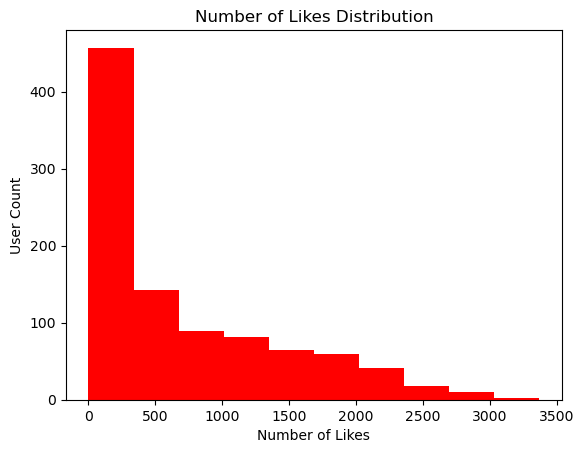

In [62]:
# Likes plot
like_distribution = person_likes_post['Person.id'].value_counts()
plt.hist(like_distribution,color = 'r')
plt.title("Number of Likes Distribution")
plt.xlabel("Number of Likes")
plt.ylabel("User Count")
plt.show()

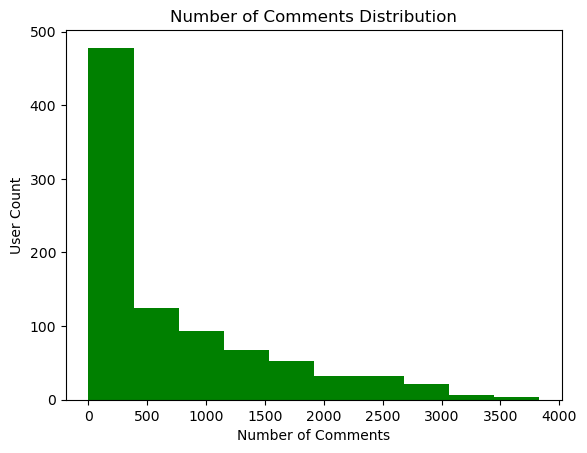

In [63]:
# Comments plot
comment_distribution = comment_hasCreator_person['Person.id'].value_counts()
plt.hist(comment_distribution, color = 'g')
plt.title("Number of Comments Distribution")
plt.xlabel("Number of Comments")
plt.ylabel("User Count")
plt.show()

The two histograms are both very skewed to the left and looks like two "L", indicating the user count for small number of likes/comments is high.

<!-- END QUESTION -->

# Q5
What is the Pearson correlation coefficient between the number of comments and the number of likes that users do on the social network? (4 points)

Print out one number. 

**Tip:** You can calculate correlation coefficient using the following formula: 
Assume that x and y are two arrays of data, in this case number of likes and comments of each user. n is the number of users. 

**Bonus Tip:** Consider that some users might have liked posts, but not liked any comments, or vice versa.

You can use whichever technique you would like for the question, as long as it has been discussed in lecture.



\begin{align*}
r= {{ n(\sum x y ) - (\sum x ) (\sum y)    } \over { \sqrt{ [ n \sum x^2  -
(\sum x)^2 ] [ n\sum y^2 - (\sum y )^2 ] } } }
\end{align*}


<!-- BEGIN QUESTION -->



In [64]:
def pearson(df):
    n = len(df)
    x = df['likes']
    y = df['comments']
    p = n*np.sum(x*x) - (np.sum(x)*np.sum(x))
    q = n*np.sum(y*y) - (np.sum(y)*np.sum(y))
    return (n*np.sum(x*y)-np.sum(x)*np.sum(y))/np.sqrt(p*q)
df = pd.concat({'comments': comment_distribution, 'likes': like_distribution}, axis = 1)
pcc = pearson(df)
pcc

0.9243697363133566

<!-- END QUESTION -->

